In [2]:
import pandas as pd
import numpy as np
import requests
import json
from pandas.io.json import json_normalize
from PIL import Image
from os import path
from bs4 import BeautifulSoup
import urllib.request
from urllib.request import urlopen
import re
import time
import aiohttp
import asyncio
from pathlib import Path
import asyncio
import sys
import ast
import matplotlib.pyplot as plt
import cv2
sys.path.append(path.abspath('MSc-CS-Project---ColourPaletteExtractor-master/'))
from colourpaletteextractor.model import model
# sys.path.append(path.abspath('old_color_palette_gen/MSc-CS-Project---ColourPaletteExtractor-master/'))
# from colourpaletteextractor.model import model

In [14]:
# import webcolors
# def closest_colour(requested_colour):
#     min_colours = {}
#     for key, name in webcolors.css3_hex_to_names.items():
#         r_c, g_c, b_c = webcolors.hex_to_rgb(key)
#         rd = (r_c - requested_colour[0]) ** 2
#         gd = (g_c - requested_colour[1]) ** 2
#         bd = (b_c - requested_colour[2]) ** 2
#         min_colours[(rd + gd + bd)] = name
#     return min_colours[min(min_colours.keys())]

# def get_colour_name(requested_colour):
#     try:
#         closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
#     except ValueError:
#         closest_name = closest_colour(requested_colour)
#         actual_name = None
#     return actual_name, closest_name

# def colour_palette_to_list(array):
#     return (array[0], array[1], array[2])

# # art_uk_df['colour_palette'][0][0]
# # requested_colour = (0, 0, 0)
# actual_name, closest_name = get_colour_name((122,2,3))
# print("Actual colour name:", actual_name, ", closest colour name:", closest_name)

In [15]:
# art_uk_df['colour_palette'][0]
def colour_palette_to_tuple_rgba(array):
    return (array[0] / 255, array[1] / 255, array[2] / 255)
# colour_palette_to_tuple_rgba(art_uk_df['colour_palette'][0][0])
# art_uk_df['relative_frequencies'][0]

In [16]:
def viewImg(number):
    path = "ArtUK_scotland_seas_coasts/" + str(art_uk_df['Accession_number'][number]) + ".jpg"
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.show()

In [17]:
def show_color_pie(num):
    Tasks = art_uk_df['relative_frequencies'][num]
    my_labels = [art_uk_df['colour_palette'][num][i] for i in range(len(art_uk_df['colour_palette'][num]))]
    
    plt.figure(figsize=(10, 10))
#    
    plt.pie(Tasks, labels = my_labels, 
            colors = [colour_palette_to_tuple_rgba(art_uk_df['colour_palette'][num][i]) for i in range(len(art_uk_df['colour_palette'][num]))],
           autopct = '%1.0f%%'
           )
    
    plt.title('Colour Palettes')
    plt.axis('equal')
    plt.show()
    
    
    viewImg(num)
   

c:\users\colo\appdata\local\programs\python\python39\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


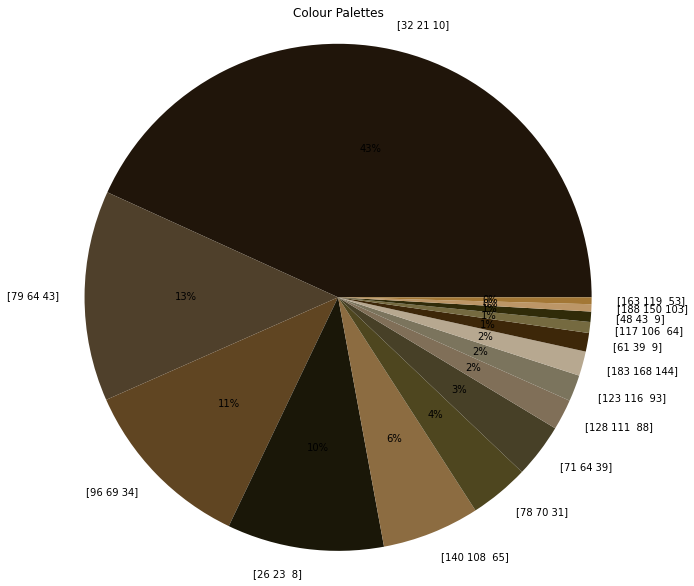

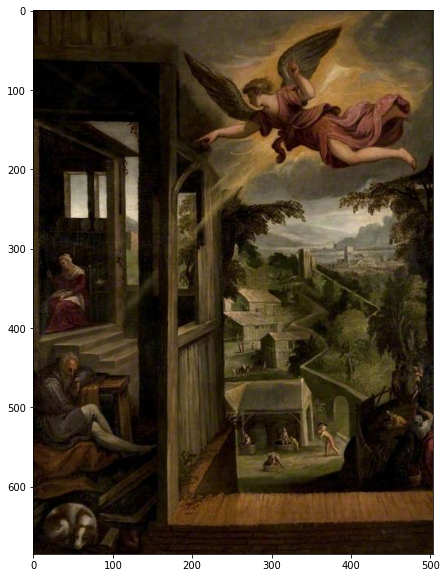

In [18]:
show_color_pie(0)